In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [17]:
specialisation = pd.read_csv("specialisation.csv", sep=";")

In [18]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

In [19]:
world.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [21]:
# dictionnaire de correspondances 'region' -> 'SOVEREIGNT'
overrides = {
    'USA': 'United States of America',
    'Trinidad': 'Trinidad and Tobago',
    'Serbia': 'Republic of Serbia',
    'Tanzania': 'United Republic of Tanzania',
    'UK': 'United Kingdom',
    'Bahamas': 'The Bahamas',
    'Macedonia': 'North Macedonia',
    'Czech Republic': 'Czechia'
    }

     
specialisation['SOVEREIGNT_corr'] = (
    specialisation['Country']
    .replace(overrides)
    .astype(str)
)


In [22]:
specialisation

,Country,max_podium,total_podium,ratio_specialisation,SOVEREIGNT_corr
0,Afghanistan,2,2,1.000000,Afghanistan
1,Curacao,1,1,1.000000,Curacao
2,Algeria,9,17,0.529412,Algeria
3,Australia,15,29,0.517241,Australia
4,Argentina,81,274,0.295620,Argentina
...,...,...,...,...,...
144,Vietnam,2,4,0.500000,Vietnam
145,Trinidad,5,5,1.000000,Trinidad and Tobago
146,Serbia,84,390,0.215385,Republic of Serbia
147,Zambia,1,2,0.500000,Zambia


In [41]:
# on va merge specialisation et world


merged = world.merge(specialisation, 
left_on = 'SOVEREIGNT',
right_on = 'SOVEREIGNT_corr',
how = 'left')

In [40]:
merged

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Country,max_podium,total_podium,ratio_specialisation,SOVEREIGNT_corr
0,Admin-0 country,1.0,3.0,Afghanistan,AFG,0.0,2.0,Sovereign country,1,Afghanistan,...,None,None,None,None,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,2,2,1.000000,Afghanistan
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,Curacao,1,1,1.000000,Curacao
2,Admin-0 country,1.0,3.0,Algeria,DZA,0.0,2.0,Sovereign country,1,Algeria,...,None,None,None,None,"POLYGON ((-8.6844 27.39574, -8.66512 27.58948,...",Algeria,9,17,0.529412,Algeria
3,Admin-0 country,1.0,2.0,Australia,AU1,1.0,2.0,Country,1,Australia,...,None,None,None,None,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",Australia,15,29,0.517241,Australia
4,Admin-0 country,1.0,2.0,Argentina,ARG,0.0,2.0,Sovereign country,1,Argentina,...,None,None,None,None,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...",Argentina,81,274,0.295620,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Admin-0 country,1.0,2.0,Vietnam,VNM,0.0,2.0,Sovereign country,1,Vietnam,...,None,None,None,None,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",Vietnam,2,4,0.500000,Vietnam
151,Admin-0 country,1.0,5.0,Trinidad and Tobago,TTO,0.0,2.0,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895...",Trinidad,5,5,1.000000,Trinidad and Tobago
152,Admin-0 country,1.0,5.0,Republic of Serbia,SRB,0.0,2.0,Sovereign country,1,Republic of Serbia,...,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,84,390,0.215385,Republic of Serbia
153,Admin-0 country,1.0,3.0,Zambia,ZMB,0.0,2.0,Sovereign country,1,Zambia,...,None,None,None,None,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",Zambia,1,2,0.500000,Zambia


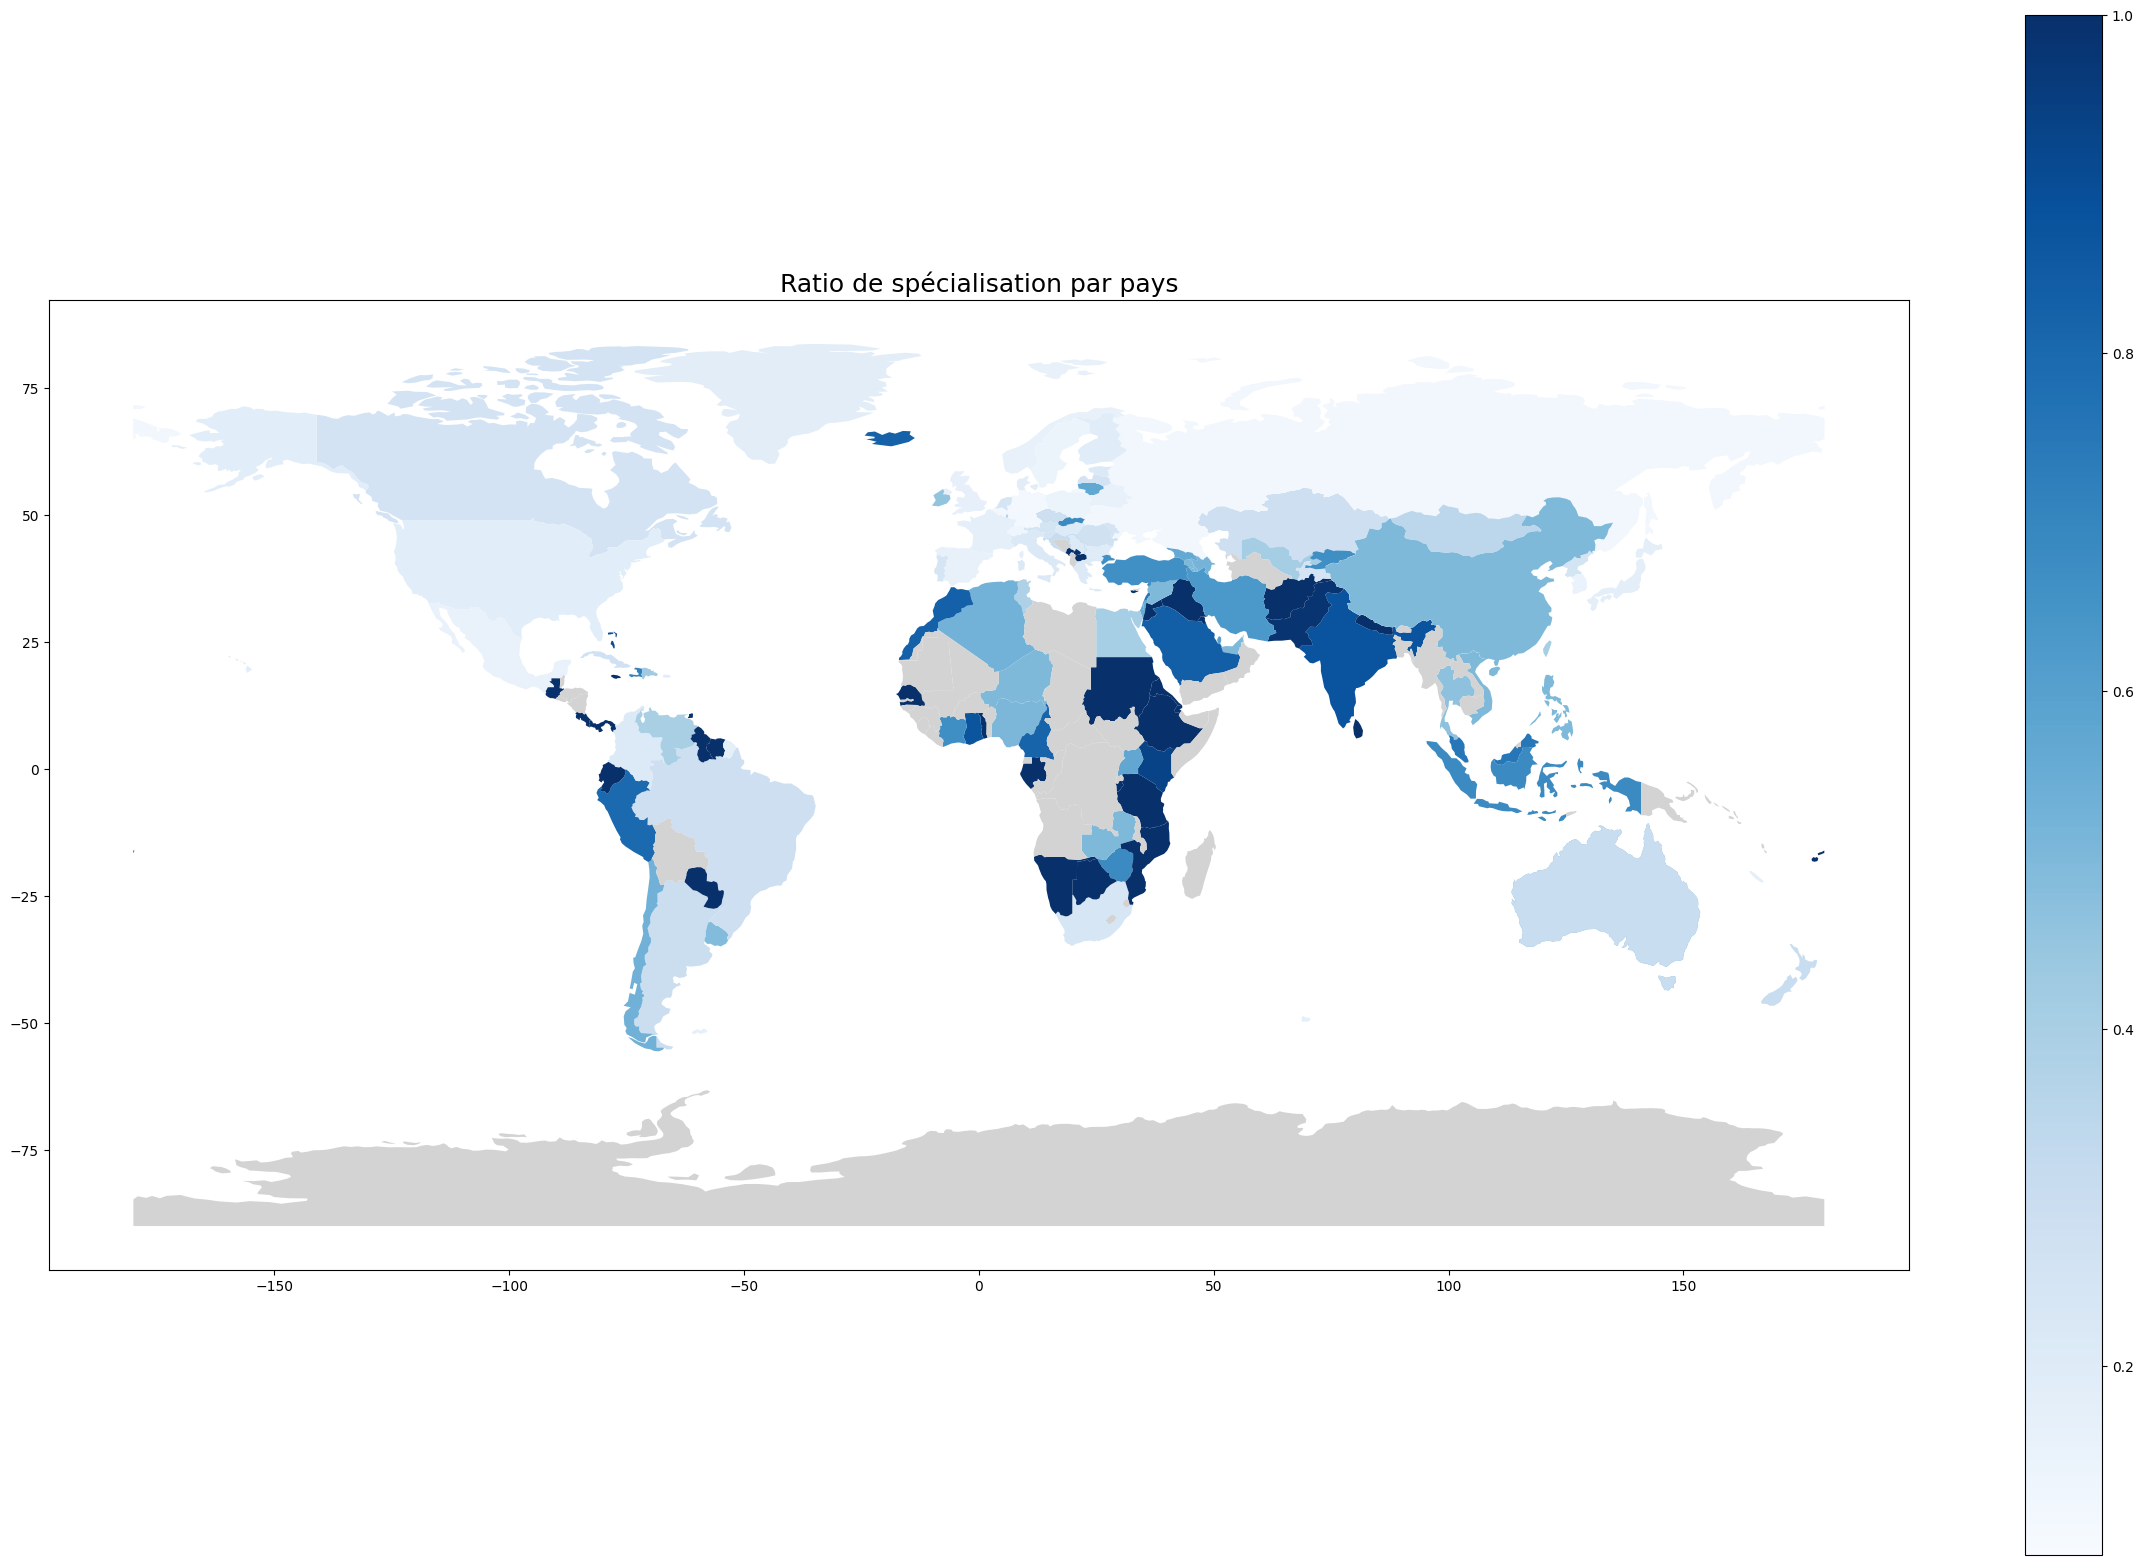

In [48]:
fig, ax = plt.subplots(1,1, figsize = (30,20)) # longueur, largeur
merged.plot(
    column = 'ratio_specialisation',
    cmap = 'Blues',
    legend = True,
    missing_kwds = { 
        "color" : "lightgrey",
        "label" : "Pas de données"
    },
    ax = ax
)
ax.set_title("Ratio de spécialisation par pays", fontsize=18)
plt.show()

In [ ]:
# 1) sélectionner dans le dataframe les pays qui sont dans le dictionnaire
# 2) ou transformer le dictionnaire en liste et sélectionner le dataframe dessu

In [ ]:
# transformer le dictionnaire en list

regions_list = list(overrides)
regions_list

['USA',
 'Trinidad',
 'Serbia',
 'Tanzania',
 'UK',
 'Bahamas',
 'Macedonia',
 'Czech Republic']

In [26]:
a = specialisation[specialisation['Country'].isin(regions_list)]
a

,Country,max_podium,total_podium,ratio_specialisation,SOVEREIGNT_corr
9,Bahamas,36,40,0.900000,The Bahamas
15,Czech Republic,6,12,0.500000,Czechia
30,Czech Republic,45,144,0.312500,Czechia
46,UK,338,2068,0.163443,United Kingdom
88,Macedonia,1,1,1.000000,North Macedonia
113,Serbia,25,64,0.390625,Republic of Serbia
117,Serbia,39,85,0.458824,Republic of Serbia
125,Tanzania,2,2,1.000000,United Republic of Tanzania
126,Czech Republic,139,488,0.284836,Czechia
132,Trinidad,28,32,0.875000,Trinidad and Tobago


In [29]:
# on sélectionne directement depuis le dictionnaire
dico_keys = overrides.keys()

b = specialisation.loc[specialisation['Country'].isin(dico_keys)]
b

,Country,max_podium,total_podium,ratio_specialisation,SOVEREIGNT_corr
9,Bahamas,36,40,0.900000,The Bahamas
15,Czech Republic,6,12,0.500000,Czechia
30,Czech Republic,45,144,0.312500,Czechia
46,UK,338,2068,0.163443,United Kingdom
88,Macedonia,1,1,1.000000,North Macedonia
113,Serbia,25,64,0.390625,Republic of Serbia
117,Serbia,39,85,0.458824,Republic of Serbia
125,Tanzania,2,2,1.000000,United Republic of Tanzania
126,Czech Republic,139,488,0.284836,Czechia
132,Trinidad,28,32,0.875000,Trinidad and Tobago
